1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [2]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

[[ 0.27530504  0.95015957 -0.01725303 ... -0.05477829 -0.68400419
   0.41072298]
 [-3.07480421 -3.7760431  -3.19200639 ...  1.47087337  0.76208215
  -2.36183032]
 [-2.52419414 -1.87572396 -3.22651244 ...  1.36131679 -0.60592622
  -1.54038435]]
Eigendecomposition of the covariance matrix
- Eigenvalues
 [ 2.61590434e+01+0.j -1.88368655e-15+0.j  1.99363066e+00+0.j]
- Matrix of the eigenvectors
 [[-0.11592934 -0.81649658  0.56559148]
 [-0.57677592 -0.40824829 -0.70757534]
 [-0.8086346   0.40824829  0.42360761]]

SVD
- Eigenvalues
 [2.61751697e+01 1.99541937e+00 2.91930605e-30]
- Matrix of the eigenvectors
 [[-0.116055    0.56556571 -0.81649658]
 [-0.5766187  -0.70770348 -0.40824829]
 [-0.8087287   0.42342794  0.40824829]]

Percentage variability
 [ 9.29185034e+01+0.j -6.69096847e-15+0.j  7.08149662e+00+0.j]


Text(0.5, 1.0, 'New data (1,2)')

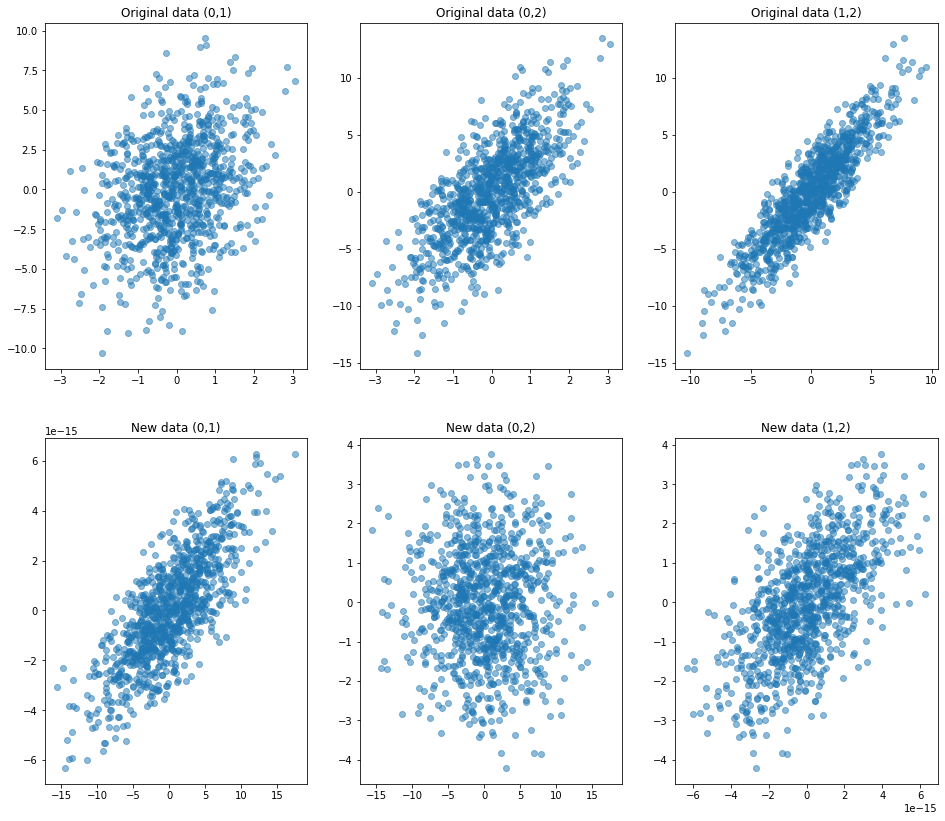

In [33]:
n = 1000

x1 = np.random.normal(loc=0, scale=1, size=n)
x2 = x1 + np.random.normal(loc=0, scale=3, size=n)
x3 = 2 * x1 + x2

A = np.array([x1, x2, x3])

print(A)

cov = np.cov(A)
l, V = la.eig(cov)
print("Eigendecomposition of the covariance matrix")
print("- Eigenvalues\n", l)
print("- Matrix of the eigenvectors\n", V)

U, S, Vt = la.svd(A)
l_svd = S**2/(n-1)
V_svd = U

print("\nSVD")
print("- Eigenvalues\n", l_svd)
print("- Matrix of the eigenvectors\n", V_svd)

Lambda = np.diag(l)

print("\nPercentage variability\n", (l/Lambda.trace())*100)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3,figsize=(16,14))

ax1.scatter(A[0,:], A[1,:], alpha=0.5)
ax1.set_title("Original data (0,1)")
ax2.scatter(A[0,:], A[2,:], alpha=0.5)
ax2.set_title("Original data (0,2)")
ax3.scatter(A[1,:], A[2,:], alpha=0.5)
ax3.set_title("Original data (1,2)")

new_A = np.dot(V.T,A)

ax4.scatter(new_A[0,:], new_A[1,:], alpha=0.5)
ax4.set_title("New data (0,1)")
ax5.scatter(new_A[0,:], new_A[2,:], alpha=0.5)
ax5.set_title("New data (0,2)")
ax6.scatter(new_A[1,:], new_A[2,:], alpha=0.5)
ax6.set_title("New data (1,2)")

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Eigendecomposition of the covariance matrix
- Eigenvalues
 [2.61849208e+01+0.j 4.15226749e-03+0.j 1.99636391e+00+0.j]
- Matrix of the eigenvectors
 [[-0.11607838 -0.81799728  0.5633882 ]
 [-0.57683353 -0.40624241 -0.70868201]
 [-0.80857213  0.40724386  0.4246923 ]]

SVD
- Eigenvalues
 [2.62013820e+01 1.99803631e+00 4.15230997e-03]
- Matrix of the eigenvectors
 [[-0.11620137  0.56336647 -0.81799478]
 [-0.57668024 -0.70880536 -0.40624482]
 [-0.8086638   0.42451522  0.40724647]]

Percentage variability
 [9.29023056e+01+0.j 1.47319607e-02+0.j 7.08296242e+00+0.j]


Text(0.5, 1.0, 'New data (1,2)')

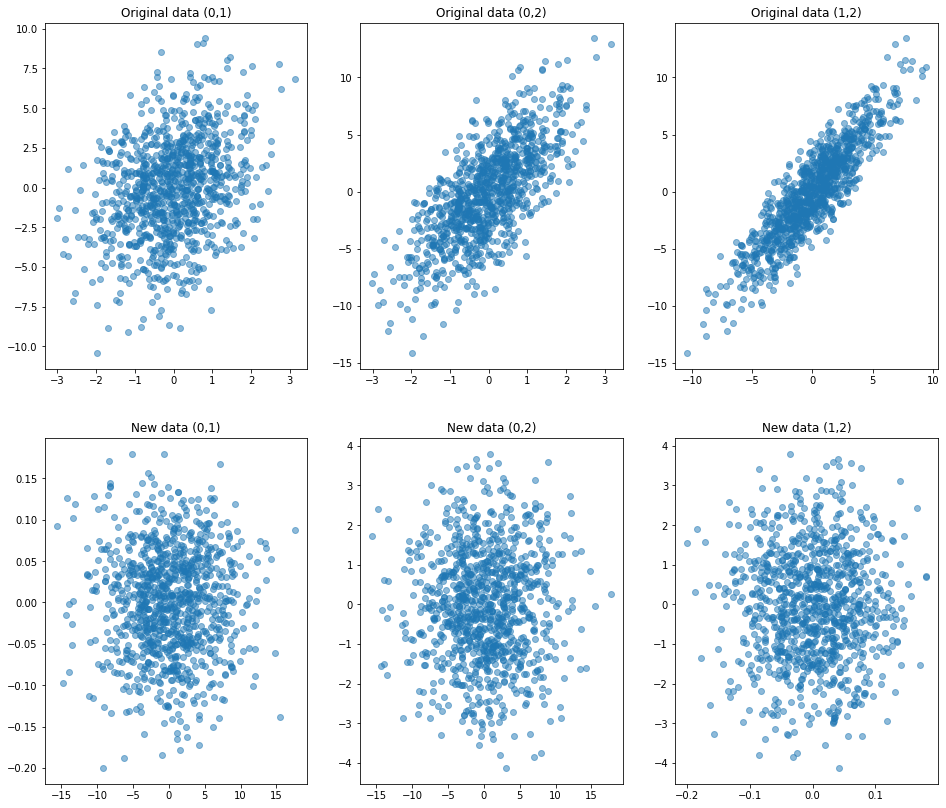

In [39]:
noise = np.random.normal(loc=0, scale=1/50, size=(3, n, 10))
A_2 = A + np.sum(noise, axis = 2)

cov_2 = np.cov(A_2)
l_2, V_2 = la.eig(cov_2)
print("Eigendecomposition of the covariance matrix")
print("- Eigenvalues\n", l_2)
print("- Matrix of the eigenvectors\n", V_2)

U_2, S_2, Vt_2 = la.svd(A_2)
l_svd_2 = S_2**2/(n-1)
V_svd_2 = U_2

print("\nSVD")
print("- Eigenvalues\n", l_svd_2)
print("- Matrix of the eigenvectors\n", V_svd_2)

Lambda_2 = np.diag(l_2)

print("\nPercentage variability\n", (l_2/Lambda_2.trace())*100)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3,figsize=(16,14))

ax1.scatter(A_2[0,:], A_2[1,:], alpha=0.5)
ax1.set_title("Original data (0,1)")
ax2.scatter(A_2[0,:], A_2[2,:], alpha=0.5)
ax2.set_title("Original data (0,2)")
ax3.scatter(A_2[1,:], A_2[2,:], alpha=0.5)
ax3.set_title("Original data (1,2)")

new_A_2 = np.dot(V_2.T,A_2)

ax4.scatter(new_A_2[0,:], new_A_2[1,:], alpha=0.5)
ax4.set_title("New data (0,1)")
ax5.scatter(new_A_2[0,:], new_A_2[2,:], alpha=0.5)
ax5.set_title("New data (0,2)")
ax6.scatter(new_A_2[1,:], new_A_2[2,:], alpha=0.5)
ax6.set_title("New data (1,2)")

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 